# Mapping 

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
poa = gpd.read_file("Shape\POA_2021_AUST_GDA2020_SHP\POA_2021_AUST_GDA2020.shp")
sa1 = gpd.read_file("Shape\SA1_2021_AUST_SHP_GDA2020\SA1_2021_AUST_GDA2020.shp")
sua = gpd.read_file("Shape\SUA_2021_AUST_GDA2020_SHP\SUA_2021_AUST_GDA2020.shp")
lga = gpd.read_file("Shape\LGA_2021_AUST_GDA2020_SHP\LGA_2021_AUST_GDA2020.shp")

In [4]:
mel_gel_sau = sua[(sua["SUA_CODE21"] == "2008") | (sua["SUA_CODE21"] == "2011")]
victoria_sa1 = sa1[sa1["SA1_CODE21"].str.startswith("2")]
victoria_poa = poa[poa["POA_CODE21"].str.startswith("3")]
victoria_lga = lga[lga["STE_NAME21"].str.startswith("V")]

In [5]:
sa1_selected  = gpd.overlay(victoria_sa1, mel_gel_sau, how='intersection')
poa_selected  = gpd.overlay(victoria_poa, mel_gel_sau, how='intersection')
lga_selected  = gpd.overlay(victoria_lga, mel_gel_sau, how='intersection')

C:\Users\danla\AppData\Local\Temp\ipykernel_22032\1719512743.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 345 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  sa1_selected  = gpd.overlay(victoria_sa1, mel_gel_sau, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_22032\1719512743.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...
Right CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...

  poa_selected  = gpd.overlay(victoria_poa, mel_gel_sau, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_22032\1719512743.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to mat

In [6]:
intersection_df  = gpd.overlay(sa1_selected, poa_selected, how='intersection')
intersection_df['intersection_area'] = intersection_df.geometry.area
intersection_df = intersection_df.sort_values(by='intersection_area', ascending=False)
intersection_df = intersection_df.groupby('SA1_CODE21', as_index=False).first()

assigment = intersection_df[["SA1_CODE21", "POA_CODE21"]]
sa1_to_poa = sa1_selected.merge(assigment, on="SA1_CODE21")

C:\Users\danla\AppData\Local\Temp\ipykernel_22032\22987385.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...
Right CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...

  intersection_df  = gpd.overlay(sa1_selected, poa_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_22032\22987385.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 623 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_df  = gpd.overlay(sa1_selected, poa_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_22032\22987385.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected C

<Figure size 1000x1000 with 0 Axes>

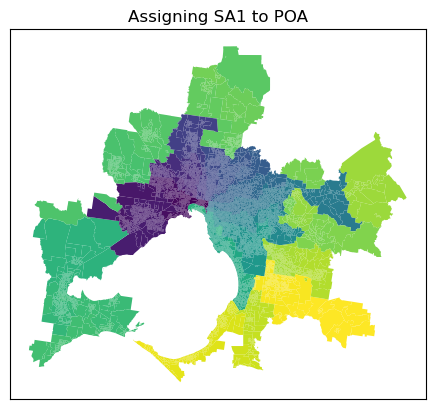

<Figure size 600x600 with 0 Axes>

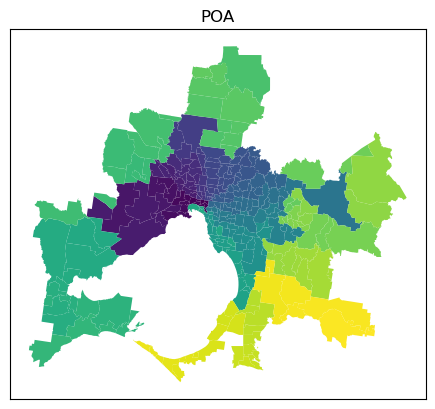

In [14]:
plt.figure(figsize=(10, 10))
sa1_to_poa.plot(column="POA_CODE21", cmap='viridis')
plt.title("Assigning SA1 to POA")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

# Create the second plot for "POA"
plt.figure(figsize=(6, 6))
poa_selected.plot(column="POA_CODE21", cmap='viridis')
plt.title("POA")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()


In [12]:
intersection_df  = gpd.overlay(sa1_selected, lga_selected, how='intersection')
intersection_df['intersection_area'] = intersection_df.geometry.area
intersection_df = intersection_df.sort_values(by='intersection_area', ascending=False)
intersection_df = intersection_df.groupby('SA1_CODE21', as_index=False).first()

assigment = intersection_df[["SA1_CODE21", "LGA_CODE21"]]
sa1_to_lga = sa1_selected.merge(assigment, on="SA1_CODE21")

C:\Users\danla\AppData\Local\Temp\ipykernel_22032\3184766781.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...
Right CRS: GEOGCS["GDA2020",DATUM["GDA2020",SPHEROID["GRS_198 ...

  intersection_df  = gpd.overlay(sa1_selected, lga_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_22032\3184766781.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1018 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersection_df  = gpd.overlay(sa1_selected, lga_selected, how='intersection')
C:\Users\danla\AppData\Local\Temp\ipykernel_22032\3184766781.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a proj

<Figure size 600x600 with 0 Axes>

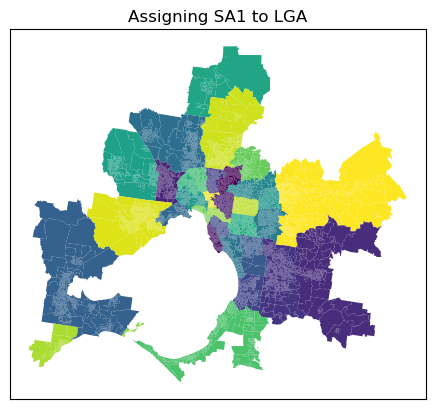

<Figure size 600x600 with 0 Axes>

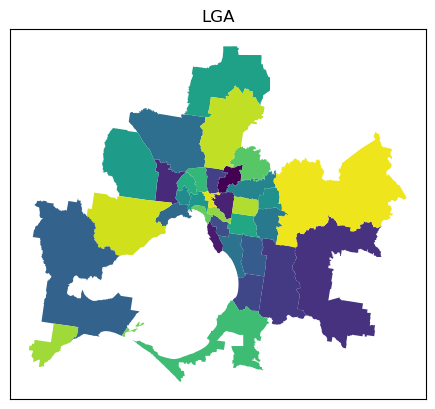

In [13]:
# Create the first plot for "Assigning SA1 to LGA"
plt.figure(figsize=(6, 6))
sa1_to_lga.plot(column="LGA_CODE21", cmap='viridis')
plt.title("Assigning SA1 to LGA")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

# Create the second plot for "LGA"
plt.figure(figsize=(6, 6))
lga_selected.plot(column="LGA_CODE21", cmap='viridis')
plt.title("LGA")
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.show()

In [25]:
len(sa1_to_poa["SA1_CODE21"].unique()), len(sa1_to_poa["POA_CODE21"].unique()), len(sa1_to_lga["LGA_CODE21"].unique())

(11947, 285, 40)

In [33]:
sa1_to_poa.to_file('Shape\sa1_to_poa.gpkg', driver='GPKG')
sa1_to_lga.to_file('Shape\sa1_to_lga.gpkg', driver='GPKG')
poa_selected.to_file('Shape\poa_selected.gpkg', driver='GPKG')